In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from math import sqrt

import seaborn as sns
sns.set(style="whitegrid")

In [28]:
def load_data(file_path):
    
    # Read the CSV file
    df = pd.read_csv(file_path, header=None, names=['Date', 'Crime_Count'])
    
    # Convert 'Date' to datetime in the specified format
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    
    # Sort by date to ensure chronological order
    df.sort_values('Date', inplace=True)
    
    # Set 'Date' as index
    df.set_index('Date', inplace=True)
    
    return df

# File path to your CSV (update this path as necessary)
file_path = 'Daily_Incidents_of_Crime_Dummy.csv'

# Load data
df = load_data(file_path)

# Display the first few rows
df.head()

,Crime_Count
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


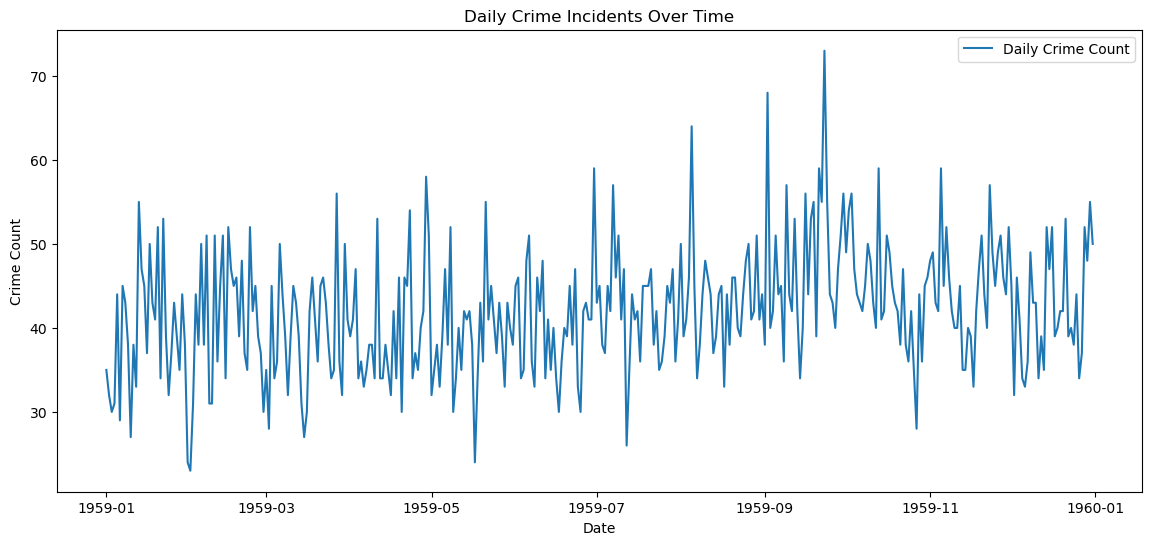

In [29]:
#EDA
# Plot the time series
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Crime_Count'], label='Daily Crime Count')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Daily Crime Incidents Over Time')
plt.legend()
plt.show()

In [30]:
# Display summary statistics
print("Summary Statistics:")
print(df['Crime_Count'].describe())

Summary Statistics:
count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Crime_Count, dtype: float64


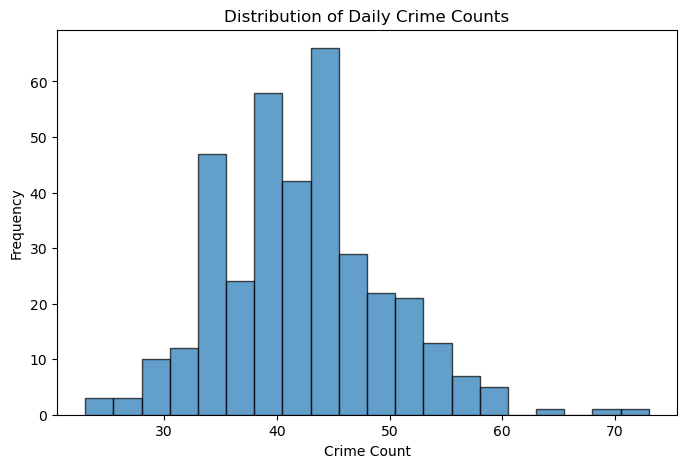

In [31]:
# Plot histogram of crime counts
plt.figure(figsize=(8,5))
plt.hist(df['Crime_Count'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Crime Count')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Crime Counts')
plt.show()

In [33]:
# 2. Feature Engineering
def create_features(df, lag=30):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['Crime_Count'].shift(i)
    df.dropna(inplace=True)
    return df
df = create_features(df, lag=30)
df.head()

,Crime_Count,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-31,24,38.0,44.0,35.0,39.0,43.0,37.0,32.0,39.0,53.0,...,27.0,38.0,43.0,45.0,29.0,44.0,31.0,30.0,32.0,35.0
1959-02-01,23,24.0,38.0,44.0,35.0,39.0,43.0,37.0,32.0,39.0,...,38.0,27.0,38.0,43.0,45.0,29.0,44.0,31.0,30.0,32.0
1959-02-02,31,23.0,24.0,38.0,44.0,35.0,39.0,43.0,37.0,32.0,...,33.0,38.0,27.0,38.0,43.0,45.0,29.0,44.0,31.0,30.0
1959-02-03,44,31.0,23.0,24.0,38.0,44.0,35.0,39.0,43.0,37.0,...,55.0,33.0,38.0,27.0,38.0,43.0,45.0,29.0,44.0,31.0
1959-02-04,38,44.0,31.0,23.0,24.0,38.0,44.0,35.0,39.0,43.0,...,47.0,55.0,33.0,38.0,27.0,38.0,43.0,45.0,29.0,44.0


In [39]:
def train_test_split_custom(df, train_size=0.5):
    n_train = int(len(df) * train_size)
    train, test = df.iloc[:n_train], df.iloc[n_train:]
    X_train, y_train = train.drop('Crime_Count', axis=1), train['Crime_Count']
    X_test, y_test = test.drop('Crime_Count', axis=1), test['Crime_Count']
    return X_train, X_test, y_train, y_test

# Split the data
X_train, X_test, y_train, y_test = train_test_split_custom(df, train_size=0.5)



In [42]:
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Train the model
model = train_model(X_train, y_train)

In [43]:
def make_predictions(model, X_test):
    predictions = model.predict(X_test)
    return predictions

# Make predictions
predictions = make_predictions(model, X_test)

# Display the first few predictions
pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).head()

,Actual,Predicted
Date,,
1959-07-17,36,39.946357
1959-07-18,45,38.827262
1959-07-19,45,34.600293
1959-07-20,45,30.810496
1959-07-21,47,40.040111


In [47]:
def evaluate_model(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    print(f'RMSE: {rmse:.3f}')
    return rmse

# Evaluate the model with original predictions
print("Evaluation with Original Predictions:")
rmse = evaluate_model(y_test, predictions)



Evaluation with Original Predictions:
RMSE: 11.904


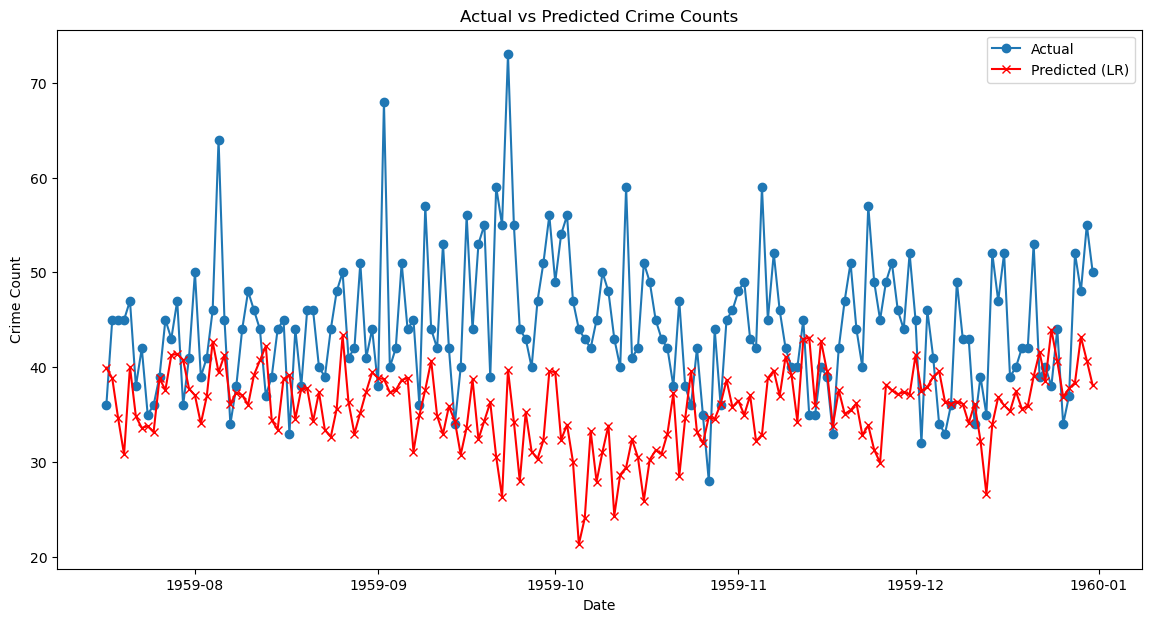

In [48]:
def plot_results(y_test, predictions, predictions_adjusted=None):
    plt.figure(figsize=(14,7))
    plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
    plt.plot(y_test.index, predictions, label='Predicted (LR)', color='red', marker='x')
    
    if predictions_adjusted is not None:
        plt.plot(y_test.index, predictions_adjusted, label='Predicted (Adjusted)', color='green', marker='x')
    
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.title('Actual vs Predicted Crime Counts')
    plt.legend()
    plt.show()

# Plot the results
plot_results(y_test, predictions)